<a href="https://colab.research.google.com/github/razvanpetru1/Test1/blob/master/Regression_task_assigment_1_Petru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset entry

In [39]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import pandas as pd # Library for data exporation

# fetch dataset
student_performance = fetch_ucirepo(id=320)

X_raw = student_performance.data.features
y_raw = student_performance.data.targets



In [40]:
print("Available metadata keys:")
print(student_performance.metadata.keys())

Available metadata keys:
dict_keys(['uci_id', 'name', 'repository_url', 'data_url', 'abstract', 'area', 'tasks', 'characteristics', 'num_instances', 'num_features', 'feature_types', 'demographics', 'target_col', 'index_col', 'has_missing_values', 'missing_values_symbol', 'year_of_dataset_creation', 'last_updated', 'dataset_doi', 'creators', 'intro_paper', 'additional_info'])


In [41]:
# Print database details:
# URL
print("Repository URL:", student_performance.metadata['repository_url'])

# Dataset name
print("Dataset Name:", student_performance.metadata['name'])
print("No instances:", student_performance.metadata['num_instances']) # samples instastances in the dataset
print("No features:", student_performance.metadata['num_features']) # features in the dataset

# Description
print("Description:", student_performance.metadata['abstract'])
print()

#Access the additional_info dictionary
additional_info = student_performance.metadata['additional_info']
print(additional_info)

# Get the 'variable_info' string
variable_info = additional_info['variable_info'] #'variable_info'

# Print the 'variable_info' string with proper formatting
print(variable_info)

Repository URL: https://archive.ics.uci.edu/dataset/320/student+performance
Dataset Name: Student Performance
No instances: 649
No features: 30
Description: Predict student performance in secondary education (high school). 

{'summary': 'This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 witho

In [42]:
# Inputs valiabe (features)
print("Features database:")
display(X_raw.head())

Features database:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,6
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,0


In [43]:
# Outputs valuable (targets)
print("Labels database:")
display(y_raw.head())

Labels database:


,G1,G2,G3
0,0,11,11
1,9,11,11
2,12,13,12
3,14,14,14
4,11,13,13


In [44]:
y_raw = y_raw[['G3']]
print(y_raw.head())

   G3
0  11
1  11
2  12
3  14
4  13


In [45]:
print(X_raw.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences'],
      dtype='object')


In [46]:
# Print before encoding
print(X_raw.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  higher internet  romantic  famrel  freetime goout Dalc Walc health absences  
0    yes       no        no       4         3     4    1    1      3        4  
1    yes      yes        no       5         3     3    1    1      3        2  
2    yes      yes        no       4         3     2    2    3      3        6  
3    yes      yes       yes       3         2     2    1    1      5        0  
4    yes       no        no       4         3     2    1    2      5        0  

[5 rows x 30 columns]


# Dataset Encoding

In [47]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd


# initialise OneHotEncoder

cat_encoder = OneHotEncoder(drop='first') # Dropping the first category makes the data less redundant and avoids multicollinearity.
# Using drop='first' in OneHotEncoder:
# Supose we have a feature 'Job' with 3 categories: teacher, health, services.
#
# Without drop='first', OneHotEncoder would create a separate column for each category: 'Job_teacher', 'Job_health', 'Job_services'
# Now, by setting drop='first', we skip the first category ('teacher') and we only create: 'Job_health', 'Job_services'
#
# THe encoding is done this way now, (PS: binary with 2 bits we can represent 4 states):
#   - 'teacher' is represented by [0, 0] (no columns active) binary = decimal 0
#   - 'health' is represented by [0, 1] binary = decimal 1
#   - 'services' is represented by [1, 0]  binary = decimal 2





In [48]:
# Encoding for binary categorical input variables
# Acces all categorical features
cat_features = ['school', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian']


# Fit and transform the categorical inputs
encoded_features = cat_encoder.fit_transform(X_raw[cat_features]).toarray()

# DataFrame with encoded features
encoded_df = pd.DataFrame(encoded_features, columns=cat_encoder.get_feature_names_out(cat_features))

# Convert binary features (yes/no) to 0/1 in X_raw
y_n_features = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
for feature in y_n_features:
    X_raw.loc[:, feature] = X_raw[feature].replace({'yes': 1, 'no': 0})

# Convert 'sex' feature to 0/1
X_raw.loc[:, 'sex'] = X_raw['sex'].replace({'F': 0, 'M': 1})


# Drop original categorical columns from X_raw
X_encoded = X_raw.drop(cat_features, axis=1)

# Concatenate the encoded features to the modified DataFrame
X_encoded = pd.concat([X_encoded, encoded_df], axis=1)

# Print after encoding
print(X_encoded.head())

  sex  age  Medu  Fedu  traveltime  studytime  failures schoolsup famsup paid  \
0   0   18     4     4           2          2         0         1      0    0   
1   0   17     1     1           1          2         0         0      1    0   
2   0   15     1     1           1          2         0         1      0    0   
3   0   15     4     2           1          3         0         0      1    0   
4   0   16     3     3           1          2         0         0      1    0   

   ... Mjob_teacher Fjob_health Fjob_other Fjob_services Fjob_teacher  \
0  ...          0.0         0.0        0.0           0.0          1.0   
1  ...          0.0         0.0        1.0           0.0          0.0   
2  ...          0.0         0.0        1.0           0.0          0.0   
3  ...          0.0         0.0        0.0           1.0          0.0   
4  ...          0.0         0.0        1.0           0.0          0.0   

   reason_home  reason_other  reason_reputation  guardian_mother  \
0     

<ipython-input-48-091c012edbb3>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_raw.loc[:, feature] = X_raw[feature].replace({'yes': 1, 'no': 0})
<ipython-input-48-091c012edbb3>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_raw.loc[:, 'sex'] = X_raw['sex'].replace({'F': 0, 'M': 1})


In [49]:
X_encoded.head()

,sex,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,0,18,4,4,2,2,0,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0,17,1,1,1,2,0,0,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,15,1,1,1,2,0,1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0,15,4,2,1,3,0,0,1,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0,16,3,3,1,2,0,0,1,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Dataset visualization

Use histograms to see the distribution of each feature.

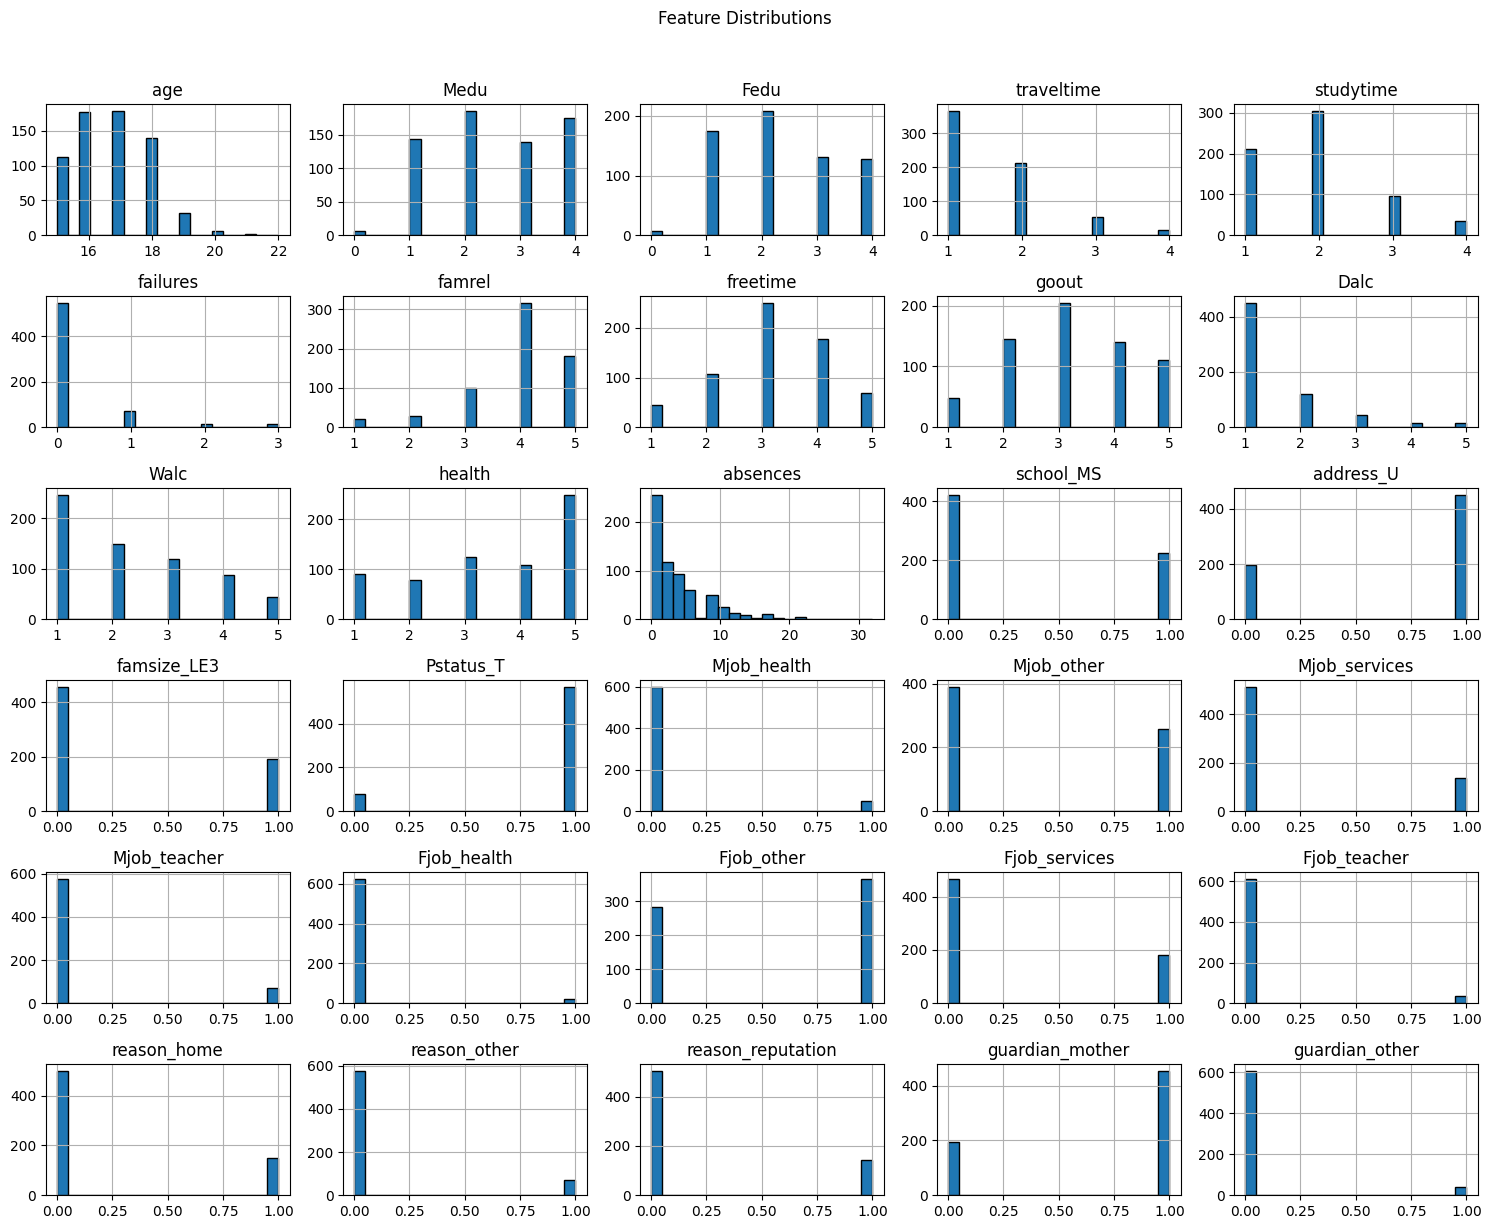

In [50]:
import matplotlib.pyplot as plt

# Plot histograms for each feature in the dataset
X_encoded.hist(bins=20, figsize=(15, 12), edgecolor='black')
plt.suptitle('Feature Distributions', y=1.02)  # Add a title for all plots
plt.tight_layout()
plt.show()

 Scatter plots to visualize the relationships between two continuous features.

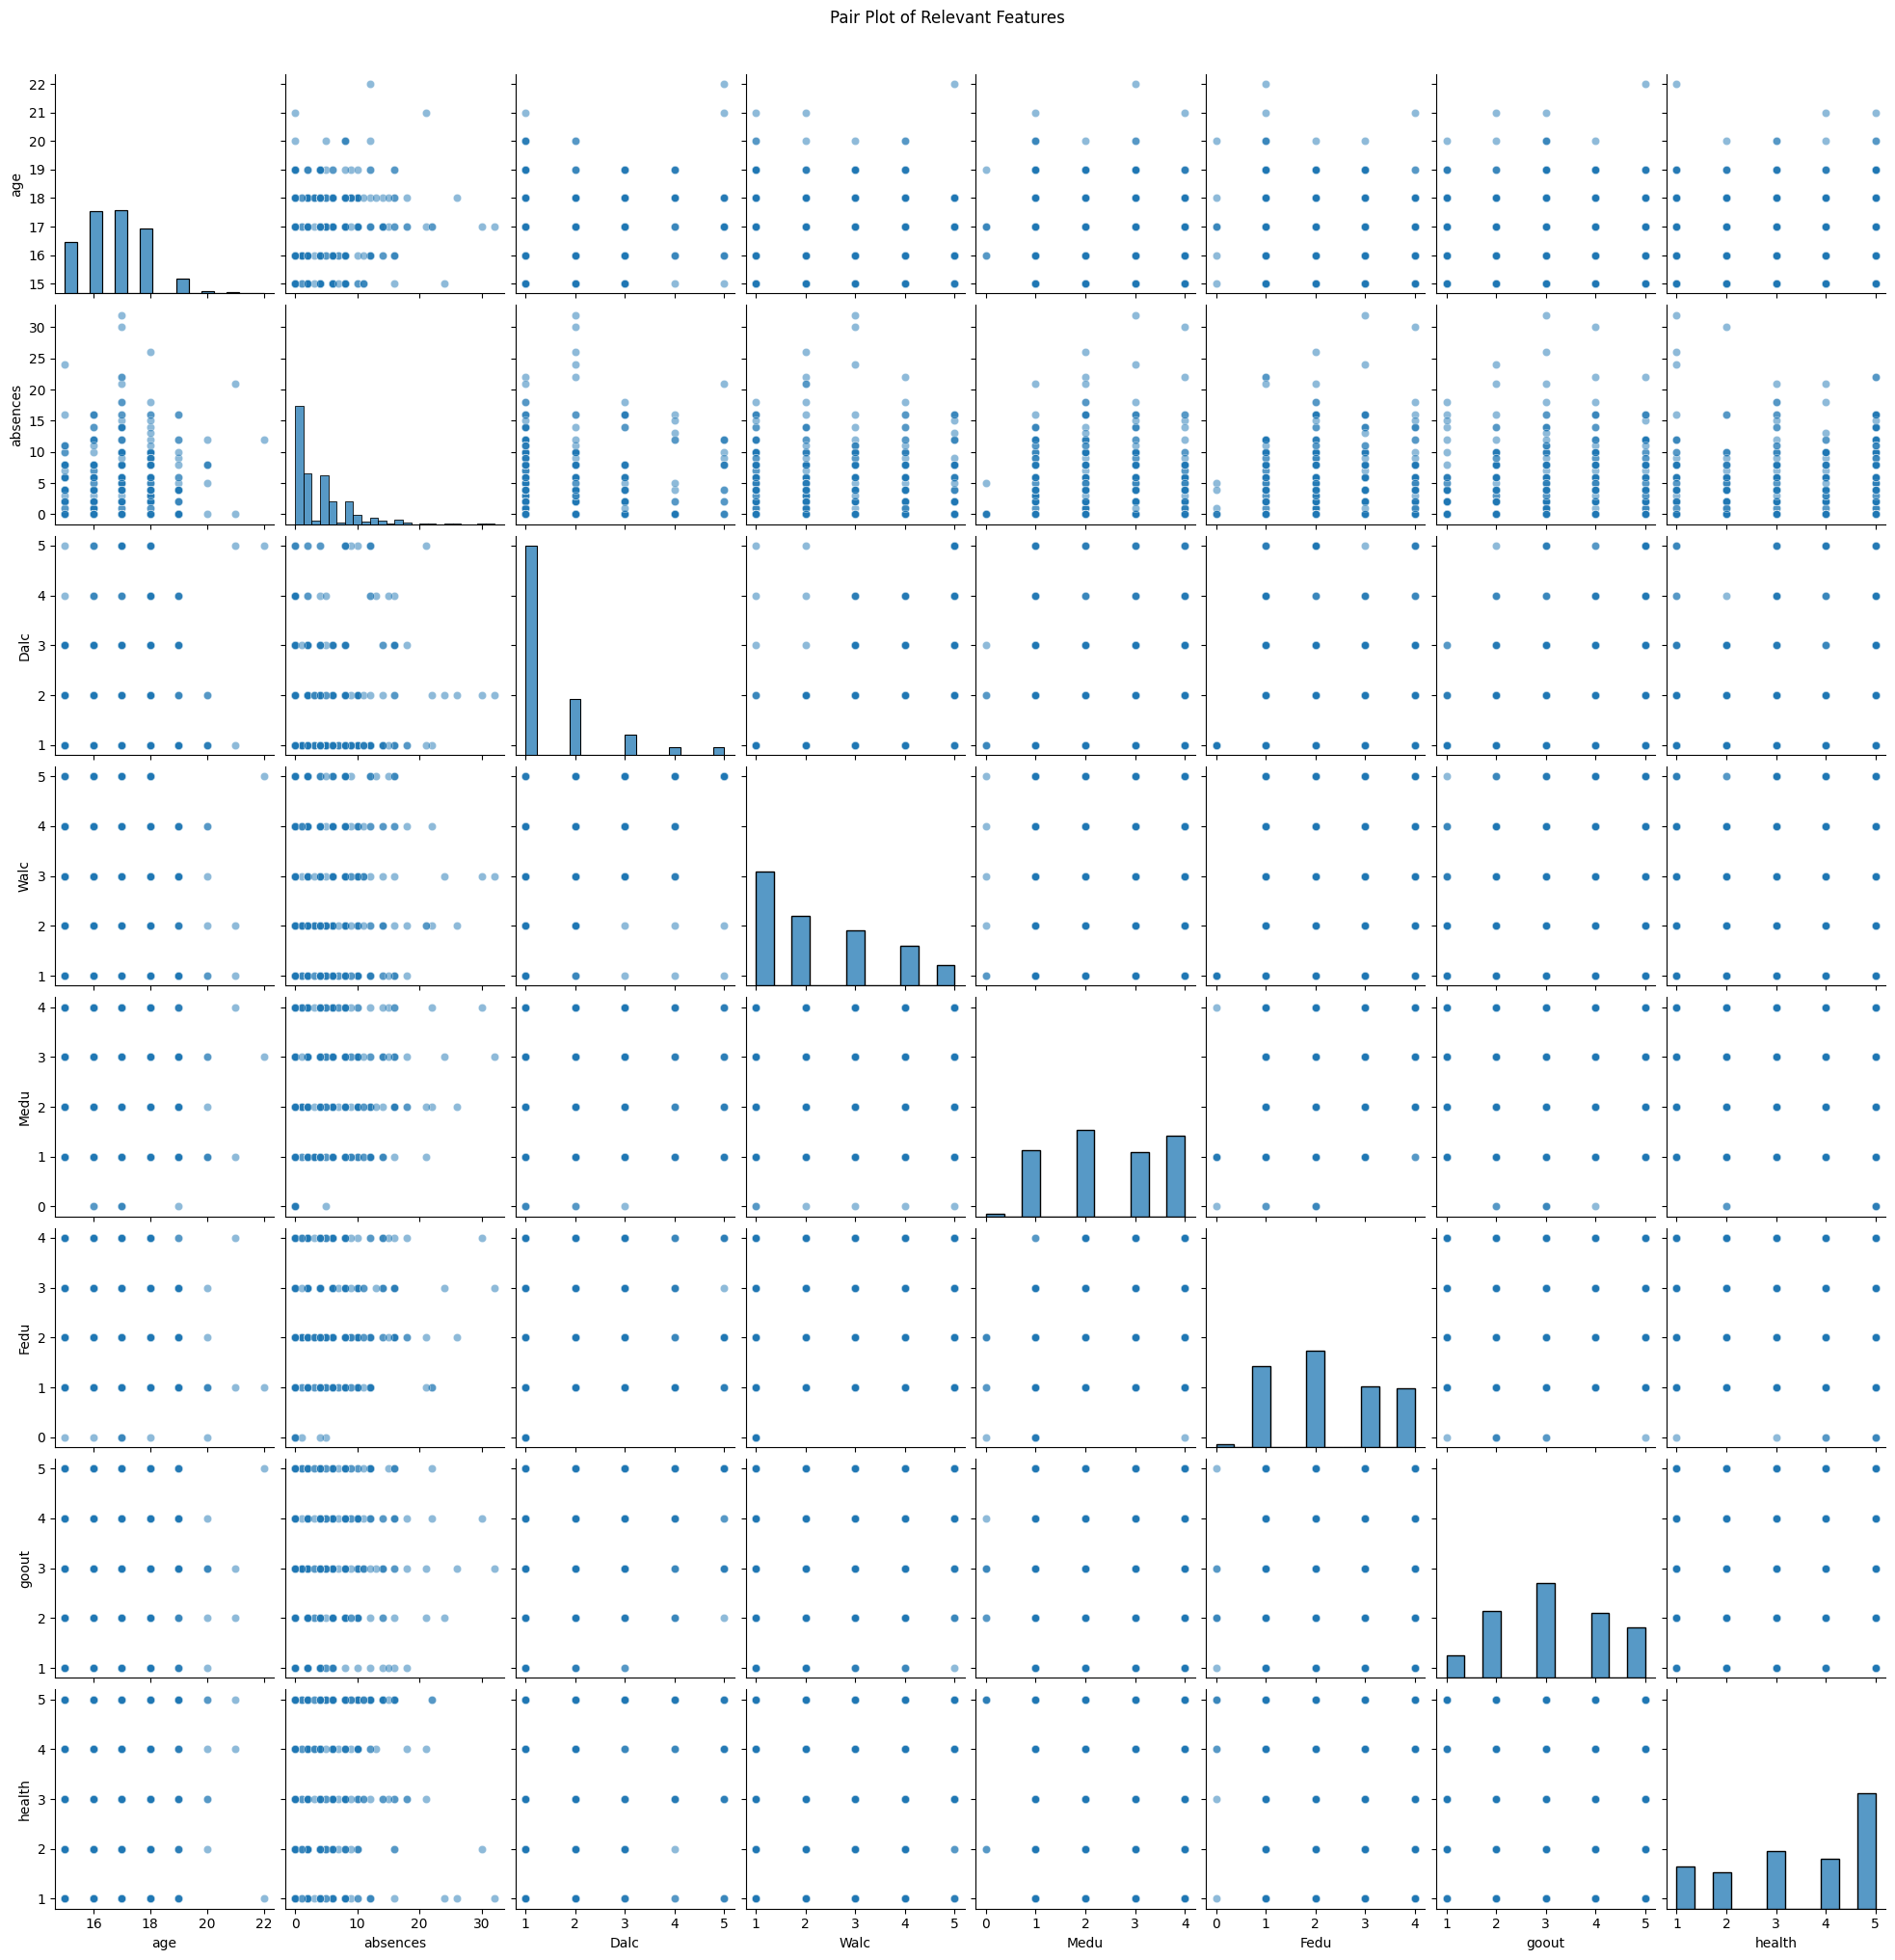

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of relevant features for the pair plot
relevant_features = ['age', 'absences', 'Dalc', 'Walc', 'Medu', 'Fedu', 'goout', 'health']

# Create a pair plot for the relevant features
sns.pairplot(X_encoded[relevant_features], height=2.5, plot_kws={'alpha':0.5})
plt.suptitle("Pair Plot of Relevant Features", y=1.02)
plt.show()

Boxplots are useful for identifying outliers

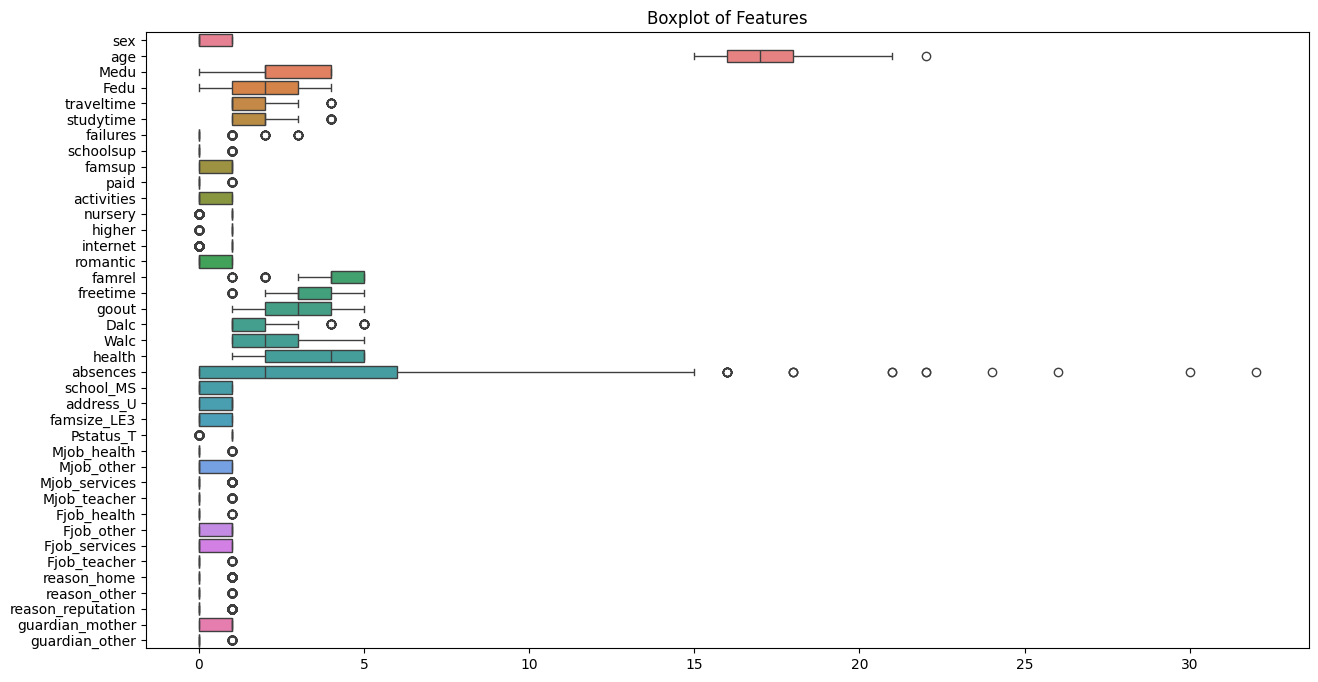

In [52]:
import seaborn as sns

# Plot boxplots for each feature
plt.figure(figsize=(15, 8))
sns.boxplot(data=X_encoded, orient='h')
plt.title('Boxplot of Features')
plt.show()

Heatmap relationships between features will help us to identify highly correlated pairs. -  Moderate Correlation: usually a concern if correlation is >0.8 or <-0.8) and we don't see this in our data.

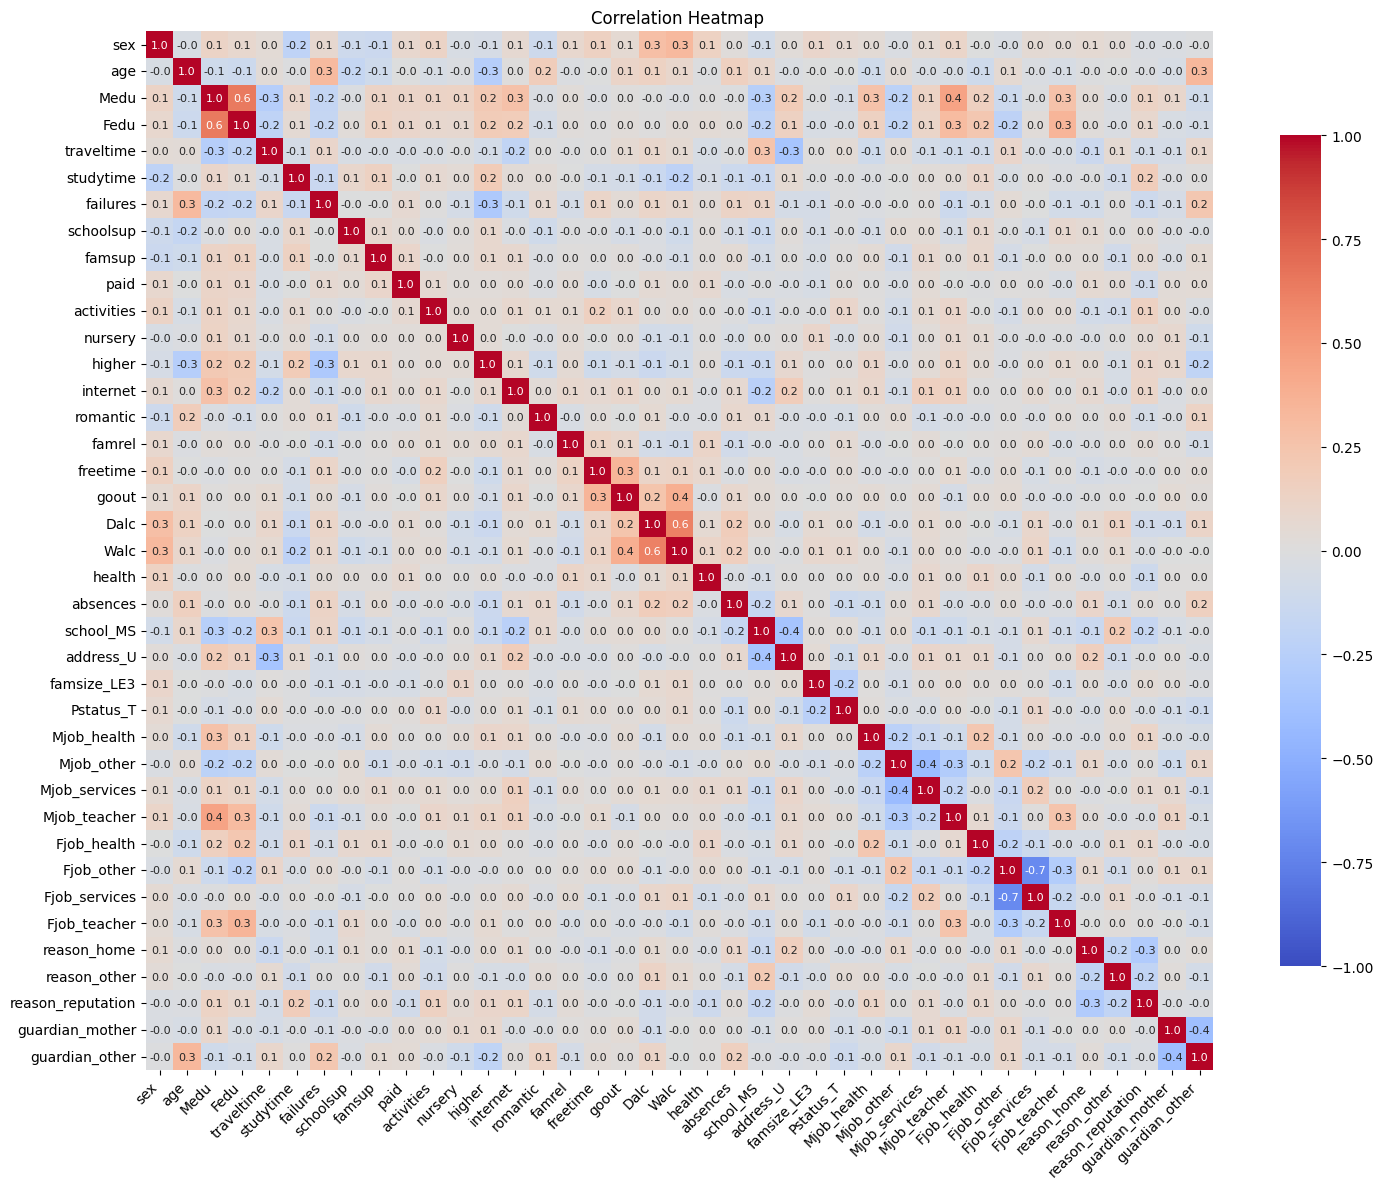

In [53]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = X_encoded.corr()

# Plot a clearer heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".1f",  # Limit decimals for clarity
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    annot_kws={"size": 8},  # Smaller annotation size for readability
    cbar_kws={"shrink": 0.8}  # Shrink the color bar for a better fit
)
plt.title('Correlation Heatmap ')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
# Moderate Correlation: usually a concern if correlation is >0.8 or <-0.8) - we don't have this.

Check data before cleaning it.

<Axes: >

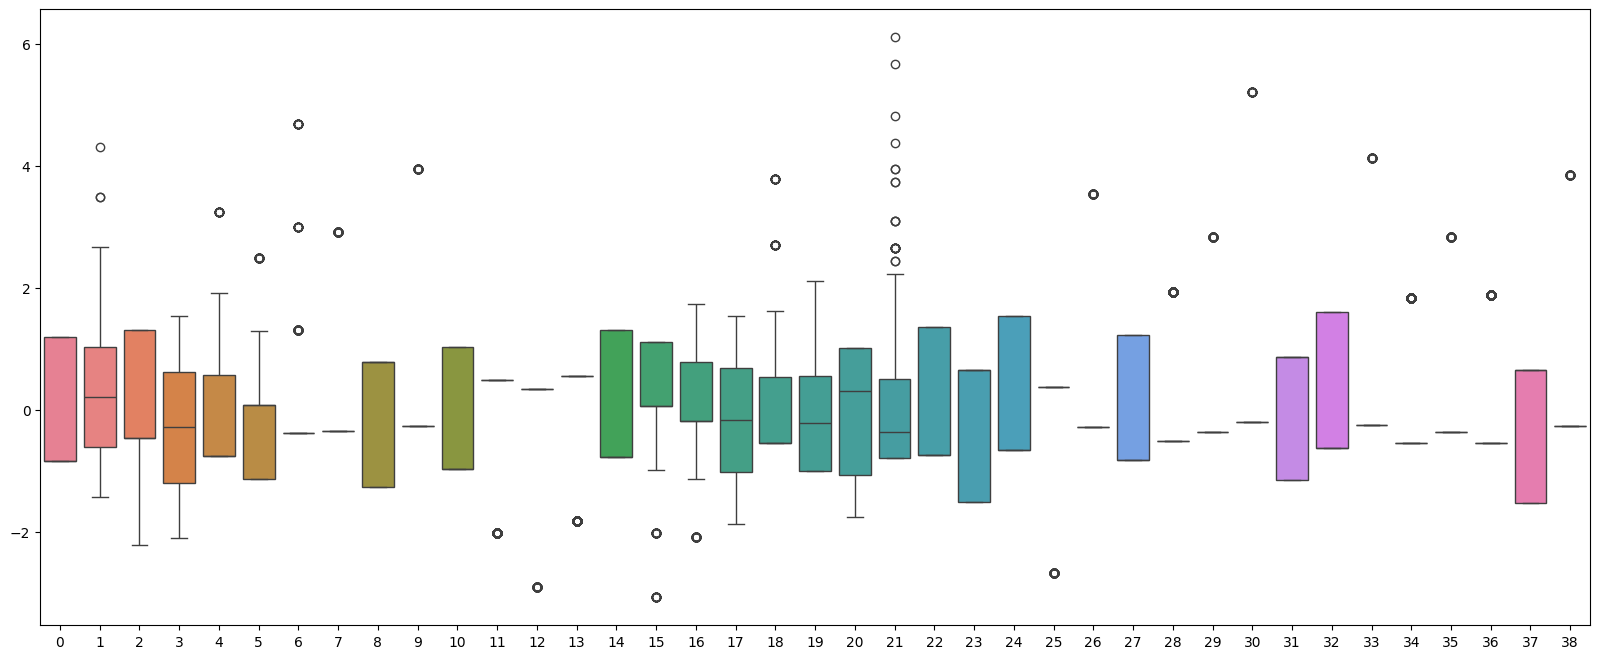

In [54]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

scaler = StandardScaler()
Xsc = scaler.fit_transform(X_encoded)
fig,ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=Xsc,ax=ax)




In [55]:
# Convert scaled data back to DataFrame for easy inspection
X_encoded_pd = pd.DataFrame(Xsc, columns=X_encoded.columns)

print("Scaled Data before cleaning ")
print(X_encoded_pd.describe().T[['mean', 'std']])

Scaled Data before cleaning 
                           mean       std
sex                5.474135e-17  1.000771
age               -1.751723e-16  1.000771
Medu              -1.094827e-16  1.000771
Fedu              -3.284481e-17  1.000771
traveltime        -7.663789e-17  1.000771
studytime          9.579736e-17  1.000771
failures           3.284481e-17  1.000771
schoolsup         -2.189654e-17  1.000771
famsup            -2.737068e-17  1.000771
paid               1.505387e-17  1.000771
activities         6.568962e-17  1.000771
nursery           -1.642241e-17  1.000771
higher            -1.861206e-16  1.000771
internet          -3.284481e-17  1.000771
romantic           1.094827e-17  1.000771
famrel            -1.628555e-16  1.000771
freetime           1.861206e-16  1.000771
goout              7.116376e-17  1.000771
Dalc              -3.284481e-17  1.000771
Walc               7.937496e-17  1.000771
health            -1.149568e-16  1.000771
absences           2.189654e-17  1.000771
schoo

# Dataset pre-procesing
**Address Outliers and unbalanced distributions**

Identify outliers and set thresholds.

In [56]:
X_cleaned = X_encoded

In [57]:

# Identify the upper and lower bounds for outliers (using the 95th percentile)
outlier_thresholds = {
    'absences': X_cleaned['absences'].quantile(0.95),
    'Dalc': X_cleaned['Dalc'].quantile(0.95),
    'Walc': X_cleaned['Walc'].quantile(0.95)
}

# Display the threshold values for outliers
print("Outlier thresholds:", outlier_thresholds)


Outlier thresholds: {'absences': 12.0, 'Dalc': 4.0, 'Walc': 5.0}


We keep extreme values within a 95%  range.

In [58]:

X_cleaned['absences'] = X_cleaned['absences'].clip(upper=30)
X_cleaned['Dalc'] = X_cleaned['Dalc'].clip(upper=4)
X_cleaned['Walc'] = X_cleaned['Walc'].clip(upper=4)

# Check results
print("Features after clipping:")
print(X_cleaned[['absences', 'Dalc', 'Walc']].describe())


Features after clipping:
         absences        Dalc        Walc
count  649.000000  649.000000  649.000000
mean     3.656394    1.476117    2.211094
std      4.622539    0.835072    1.156090
min      0.000000    1.000000    1.000000
25%      0.000000    1.000000    1.000000
50%      2.000000    1.000000    2.000000
75%      6.000000    2.000000    3.000000
max     30.000000    4.000000    4.000000


In [59]:
# Cap values above the 95th percentile
for feature, threshold in outlier_thresholds.items():
    X_cleaned[feature] = X_cleaned[feature].apply(lambda x: min(x, threshold))

print(X_cleaned[['absences', 'Dalc', 'Walc']].describe())


         absences        Dalc        Walc
count  649.000000  649.000000  649.000000
mean     3.377504    1.476117    2.211094
std      3.748768    0.835072    1.156090
min      0.000000    1.000000    1.000000
25%      0.000000    1.000000    1.000000
50%      2.000000    1.000000    2.000000
75%      6.000000    2.000000    3.000000
max     12.000000    4.000000    4.000000


Adjust uneven features so they don’t influence the model too much.

In [60]:
import numpy as np

# Applying a square root transformation to improve the simetry
X_cleaned['absences'] = np.sqrt(X_cleaned['absences'])

# Check the transformation
print("After square root transformation:")
print(X_cleaned['absences'].describe())


After square root transformation:
count    649.000000
mean       1.380105
std        1.214531
min        0.000000
25%        0.000000
50%        1.414214
75%        2.449490
max        3.464102
Name: absences, dtype: float64


Check data after cleaning it.

<Axes: >

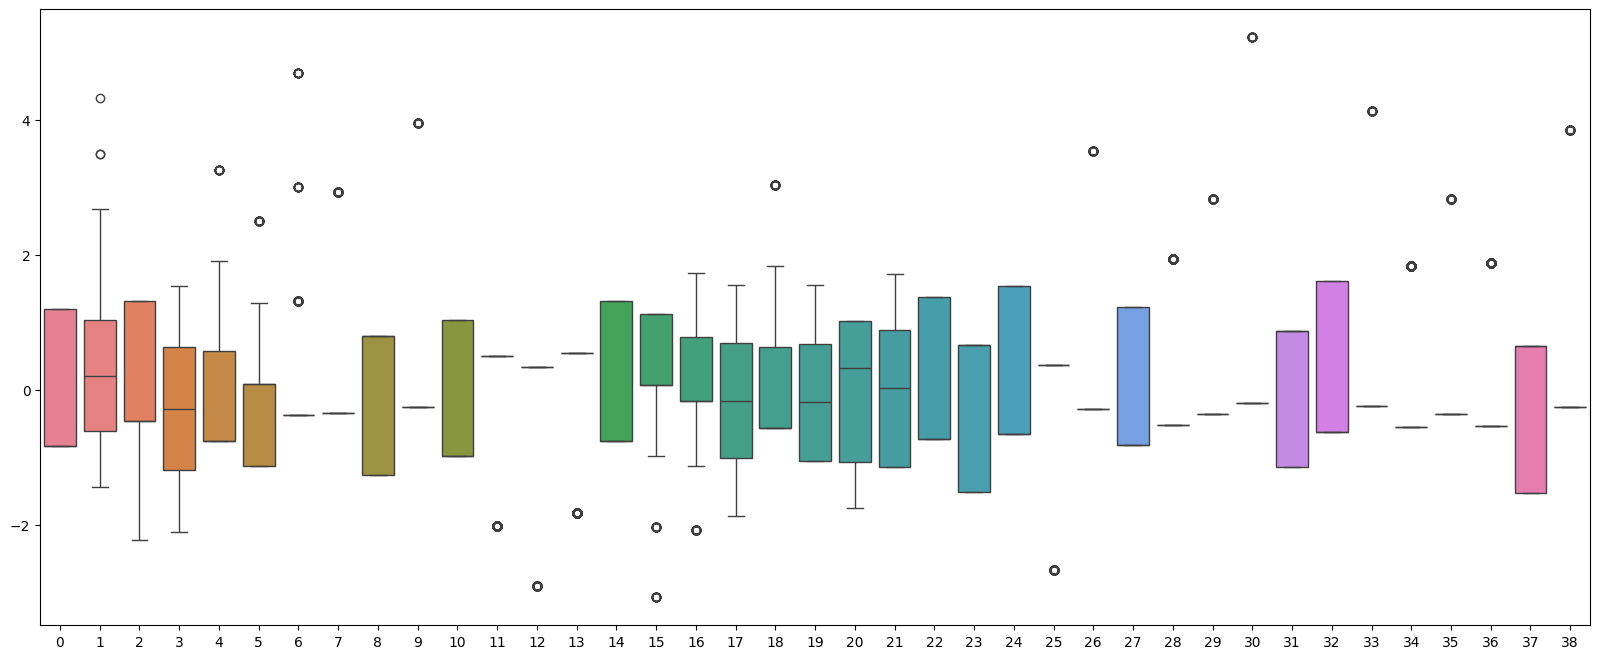

In [61]:

scaler = StandardScaler()
Xs = scaler.fit_transform(X_cleaned)
fig,ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=Xs,ax=ax)


In [62]:
# Convert scaled data back to DataFrame for easy inspection
Xs = pd.DataFrame(Xs, columns=X_encoded.columns)

print("Scaled Data before cleaning ")
print(Xs.describe().T[['mean', 'std']])

Scaled Data before cleaning 
                           mean       std
sex                5.474135e-17  1.000771
age               -1.751723e-16  1.000771
Medu              -1.094827e-16  1.000771
Fedu              -3.284481e-17  1.000771
traveltime        -7.663789e-17  1.000771
studytime          9.579736e-17  1.000771
failures           3.284481e-17  1.000771
schoolsup         -2.189654e-17  1.000771
famsup            -2.737068e-17  1.000771
paid               1.505387e-17  1.000771
activities         6.568962e-17  1.000771
nursery           -1.642241e-17  1.000771
higher            -1.861206e-16  1.000771
internet          -3.284481e-17  1.000771
romantic           1.094827e-17  1.000771
famrel            -1.628555e-16  1.000771
freetime           1.861206e-16  1.000771
goout              7.116376e-17  1.000771
Dalc              -1.915947e-16  1.000771
Walc              -8.074349e-17  1.000771
health            -1.149568e-16  1.000771
absences           2.189654e-17  1.000771
schoo

# Dataset Splitting

**Split Data into Training, Validation, and Testing Sets**

In [63]:
Xs = Xs # features
y = y_raw # all outputs

Training Set: 70% of the original data (Xs_train and y_train)

Validation Set: 15% of the original data (Xs_val and y_val)

Testing Set: 15% of the original data (Xs_test and y_test)

In [64]:
from sklearn.model_selection import train_test_split
# split the data into training + remaining (validation + testing)
Xs_train, Xs_rem, y_train, y_rem = train_test_split(Xs, y, test_size=0.3, random_state=42)

# split the remaining data into validation and testing sets
Xs_test, Xs_val, y_test, y_val = train_test_split(Xs_rem, y_rem, test_size=0.5, random_state=42) # 0.5 x 0.3 = 0.15


# Display the sizes of each set to confirm
print("Training set size:", Xs_train.shape[0])
print("Validation set size:", Xs_val.shape[0])
print("Testing set size:", Xs_test.shape[0])

Training set size: 454
Validation set size: 98
Testing set size: 97


**PCA - optional step**

If our feature set is large and some features are highly correlated, PCA is useful - we didn't see that.
We can try implementing PCA as an optional step and compare the results.

In [65]:

from sklearn.decomposition import PCA
feature_names = list(X_raw.columns)

pca = PCA(n_components=10, random_state=42)
Xs_train_pca = pca.fit_transform(Xs_train)
Xs_test_pca = pca.transform(Xs_test)
Xs_val_pca = pca.transform(Xs_val)
#final train,test,val splits to run on the models X_train_pca for training and likewise for the test data
#good practice to split seperately afterwards rather than before like in the workshop
#(according to google anyway)

# Training: Regression task models

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

Training Set: 70% of the original data (Xs_train and y_train)

Validation Set: 15% of the original data (Xs_val and y_val)

Testing Set: 15% of the original data (Xs_test and y_test)

**Linear Regression**

In [67]:
# Initialise the model
lin_reg = LinearRegression()

# we train the model
lin_reg.fit(Xs_train, y_train)

# predict on validation set
y_val_pred = lin_reg.predict(Xs_val)

# Evaluate using MSE
mse_lin_reg = mean_squared_error(y_val, y_val_pred)
print("Linear Regression MSE:", mse_lin_reg)


Linear Regression MSE: 9.069500055708076


**Support Vector Machine (SVM) Regressorr**

In [68]:
svr = SVR()
# Convert y_train to a NumPy array and flatten it using .ravel()
svr.fit(Xs_train, y_train.values.ravel())

# Predict on validation set
y_val_pred = svr.predict(Xs_val)

# Evaluate using MSE
mse_svr = mean_squared_error(y_val, y_val_pred)
print("SVR MSE:", mse_svr)

SVR MSE: 9.139773105596324


**Decision Tree Regresor**

In [69]:
# Initialize the model with a max depth to avoid overfitting
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)

# Train the model
tree_reg.fit(Xs_train, y_train)

# Predict on validation set
y_val_pred = tree_reg.predict(Xs_val)

# Evaluate using MSE
mse_tree_reg = mean_squared_error(y_val, y_val_pred)
print("Decision Tree Regression MSE:", mse_tree_reg)

Decision Tree Regression MSE: 9.360389540739437


**Tuning Hyperparameters**

In [70]:
from sklearn.model_selection import GridSearchCV

# Setting up the parameters for the Decision Tree to find the best settings
param_grid = {
    'max_depth': [1, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}


# Set up GridSearchCV
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(Xs_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)

Best parameters: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 8.02799426477689


In [71]:

# Retrain Decision Tree Regressor with the best parameters
optimized_tree_reg = DecisionTreeRegressor(
    max_depth=3,
    min_samples_split=10,
    min_samples_leaf=1,
    random_state=42
)


# Train on the full training set
optimized_tree_reg.fit(Xs_train, y_train)

# Predict on the test set
y_test_pred = optimized_tree_reg.predict(Xs_test)

# Evaluate using MSE on the test set
mse_optimized_tree_test = mean_squared_error(y_test, y_test_pred)
print("Optimized Decision Tree Regression Test MSE:", mse_optimized_tree_test)


Optimized Decision Tree Regression Test MSE: 7.921369004221843


**Multi-Layer Perceptron (MLP) Regressor**

In [72]:
# Initialize the model with basic parameters
mlp_reg = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42, early_stopping=True) #Use early stopping for automatic control of overfitting and unnecessary iterations.

# Train the model, converting y_train to a NumPy array and using .ravel() to flatten it
mlp_reg.fit(Xs_train, y_train.values.ravel())

# Predict on validation set
y_val_pred = mlp_reg.predict(Xs_val)


mse_mlp_reg = mean_squared_error(y_val, y_val_pred)
print("MLP Regressor MSE:", mse_mlp_reg)

MLP Regressor MSE: 9.544540369083721


In [73]:
print("Summary MSE results on training set: \n ")
print("Linear Regression MSE:", mse_lin_reg)
print("SVR Test MSE:", mse_svr)
print("Best Decision Tree Regression Test MSE:", mse_tree_reg)
print("MLP Regressor Test MSE:", mse_mlp_reg)


Summary MSE results on training set: 
 
Linear Regression MSE: 9.069500055708076
SVR Test MSE: 9.139773105596324
Best Decision Tree Regression Test MSE: 9.360389540739437
MLP Regressor Test MSE: 9.544540369083721


# Models Evaluation

**Cross-Validation k-fold** \
List of models to evaluate

In [74]:
from sklearn.metrics import make_scorer
from sklearn.model_selection  import cross_val_score

# Define a mean squared error score for cross_val_score
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

models = [
    ('Linear Regression', LinearRegression()),
    ('Support Vector Regression', SVR()),
    ('Decision Tree Regression', DecisionTreeRegressor(max_depth=3, min_samples_split=10, min_samples_leaf=1, random_state=42)),
    ('MLP Regressor', MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42, early_stopping=True))
]

mse_results = {
    "Linear Regression": mse_lin_reg,
    "Support Vector Regression": mse_svr,
    "Decision Tree Regression": mse_tree_reg,
    "MLP Regressor": mse_mlp_reg
}
# Perform 5-fold cross-validation for every model
for model_name, model in models:
    mse_scores = cross_val_score(model, Xs, y.values.ravel(), cv=5, scoring=mse_scorer)
    mean_mse = -np.mean(mse_scores)  # Negate because we used greater_is_better=False

    mse_results[model_name] = mean_mse

    print(f"{model_name} - Mean CV MSE: {mean_mse:.4f}, Std Dev MSE: {np.std(mse_scores):.4f}")


best_model = min(mse_results, key=mse_results.get)
best_mse = mse_results[best_model]

worst_model = max(mse_results, key=mse_results.get)
worst_mse = mse_results[worst_model]


print(f"The most accurate model in cross-validation was {best_model} with an MSE of {best_mse:.5f}.")
print(f"The worst accurate model in cross-validation was {worst_model} with an MSE of {worst_mse:.5f}.")





Linear Regression - Mean CV MSE: 8.0667, Std Dev MSE: 4.5498
Support Vector Regression - Mean CV MSE: 7.7601, Std Dev MSE: 4.4165
Decision Tree Regression - Mean CV MSE: 9.6437, Std Dev MSE: 4.4144
MLP Regressor - Mean CV MSE: 10.0190, Std Dev MSE: 4.5331
The most accurate model in cross-validation was Support Vector Regression with an MSE of 7.76009.
The worst accurate model in cross-validation was MLP Regressor with an MSE of 10.01904.


**Final evaluation on the test dataset**

Steps:
 Train on the full training set \
 Predict on the test set Xs_test \
 Evaluate using MSE : y_test and y_test_pred

In [75]:
print("\nFinal Test MSEs:\n")

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(Xs_train, y_train)
y_test_pred = lin_reg.predict(Xs_test)
mse_lin_reg = mean_squared_error(y_test, y_test_pred)
print("Linear Regression Test MSE:", mse_lin_reg)


# SVR
svr.fit(Xs_train, y_train.values.ravel())
y_test_pred = svr.predict(Xs_test)
mse_svr = mean_squared_error(y_test, y_test_pred)
print("SVR Test MSE:", mse_svr)


# Decision Tree Regression
best_tree_reg = DecisionTreeRegressor(**grid_search.best_params_, random_state=42)  # Use best parameters from GridSearchCV line 164
best_tree_reg.fit(Xs_train, y_train)
y_test_pred = best_tree_reg.predict(Xs_test)
mse_tree_reg = mean_squared_error(y_test, y_test_pred)
print("Best Decision Tree Regression Test MSE:", mse_tree_reg)


# MLP Regressor
mlp_reg = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42, early_stopping=True)
mlp_reg.fit(Xs_train, y_train.values.ravel())
y_test_pred = mlp_reg.predict(Xs_test)
mse_mlp_reg = mean_squared_error(y_test, y_test_pred)
print("MLP Regressor Test MSE:", mse_mlp_reg)

# results:
mse_results = {
    "Linear Regression": mse_lin_reg,
    "Support Vector Regression": mse_svr,
    "Decision Tree Regression": mse_tree_reg,
    "MLP Regressor": mse_mlp_reg
}

best_model = min(mse_results, key=mse_results.get)
best_mse = mse_results[best_model]

worst_model = max(mse_results, key=mse_results.get)
worst_mse = mse_results[worst_model]

print(f" \nThe best model is {best_model} with a MSE on tesd dataset of: {best_mse:.5f}.")
print(f" \nThe worst model is {worst_model} with a MSE on tesd dataset of: {worst_mse:.5f}.")








Final Test MSEs:

Linear Regression Test MSE: 8.45006763661096
SVR Test MSE: 7.773416876267347
Best Decision Tree Regression Test MSE: 8.627943140697756
MLP Regressor Test MSE: 9.359325186393864
 
The best model is Support Vector Regression with a MSE on tesd dataset of: 7.77342.
 
The worst model is MLP Regressor with a MSE on tesd dataset of: 9.35933.


In [76]:
print(f"The model that performed best infinal test MSE is {best_model} with a Mean Squared Error of {best_mse:.5f}.")
print(f"On the other hand, {worst_model} had the highest error, with an MSE of {worst_mse:.5f}.")


The model that performed best infinal test MSE is Support Vector Regression with a Mean Squared Error of 7.77342.
On the other hand, MLP Regressor had the highest error, with an MSE of 9.35933.
